In [66]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

# PageRank Algorithm

In [67]:
M = np.array([[0, 0, 1/2, 0], [1/3, 0, 0, 1/2], [1/3, 1/2, 0, 1/2], [1/3, 1/2, 1/2, 0]])

In [68]:
eigenvalues, eigenvectors = scipy.linalg.eig(M)

In [69]:
index_of_largest = np.argmax(eigenvalues)
largest_eigvec = eigenvectors[:, index_of_largest]
print(largest_eigvec)
largest_eigvec = largest_eigvec / np.sum(largest_eigvec)
print(largest_eigvec)

[0.30460385+0.j 0.40613847+0.j 0.6092077 +0.j 0.6092077 +0.j]
[0.15789474+0.j 0.21052632+0.j 0.31578947+0.j 0.31578947+0.j]


In [70]:
v = np.ones((4,1))
v_next = M @ v

while np.linalg.norm(v_next - v) > 1e-6:
    v = v_next
    v_next = M @ v

v_next = v_next / np.sum(v_next)

In [71]:
print(v_next)

[[0.15789477]
 [0.21052633]
 [0.31578945]
 [0.31578945]]


I computed the dominant eigenvector in two ways. One way was by using the scipy package. The second way was through iterating on an initial rank vector until convergence. Both methods resulted in the same eigenvector when normalized. The eigenvector represents the stationary probability that the person is on that webpage in the long run. The 3rd and 4th website have identitcal entries, so they are tied for highest rank.

# Dimensionality Reduction via PCA


In [72]:
#upload csv file
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (2).csv


In [73]:
data = pd.read_csv("data.csv")
data


,Height,Weight
0,1.764052,1.883151
1,0.400157,-1.347759
2,0.978738,-1.270485
3,2.240893,0.969397
4,1.867558,-1.173123
...,...,...
95,0.706573,-0.171546
96,0.010500,0.771791
97,1.785870,0.823504
98,0.126912,2.163236


In [74]:
#compute covariance matrix
cov_matrix = data.cov()
print(cov_matrix)


          Height    Weight
Height  1.026087  0.117691
Weight  0.117691  1.081349


In [75]:
# eigenvalue decomposition
eigenvalues_2, eigenvectors_2 = scipy.linalg.eigh(cov_matrix)
print(eigenvalues_2)
print(eigenvectors_2)

[0.93282774 1.17460905]
[[-0.78376051  0.62106317]
 [ 0.62106317  0.78376051]]


Principal Component 1 corresponds to the largest eigenvalue (1.1746) and explains the most variance in this set. This has eigenvector [0.62 0.78]
Since both of these components are positive, there is a positive correlation between height and weight.

The second principal component corresponds to the smaller eigenvalue and has the eigenvector
[−0.78,0.62]. One sign is positive and one is negative, which means height and weight have a negative correlation.


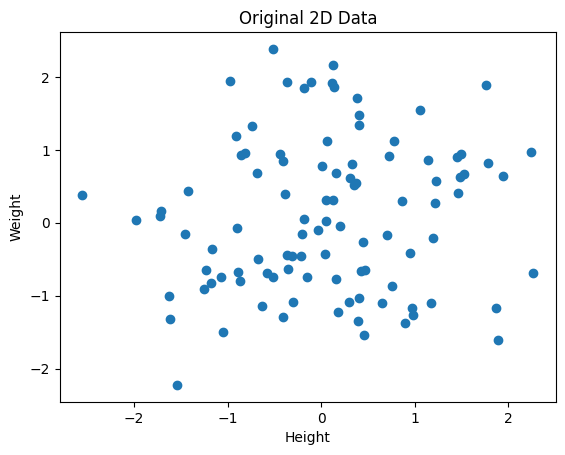

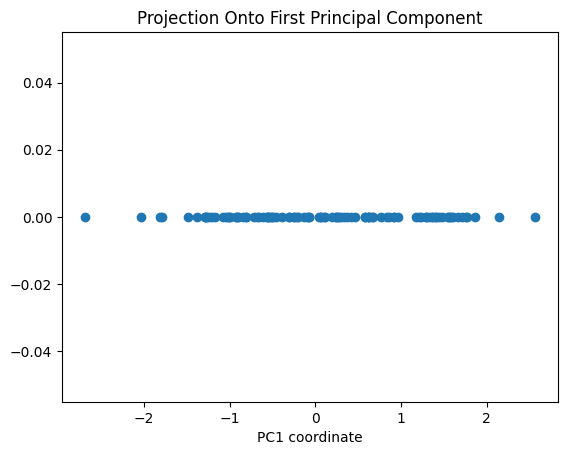

In [76]:
#put data in a matrix to easily graph
data_matrix = data[["Height", "Weight"]].values

#find first principal component
index = np.argmax(eigenvalues_2)
pc1 = eigenvectors_2[:, index]

#project data set onto first principal component
projection = data_matrix @ pc1

#plot original data
plt.figure()
plt.scatter(data_matrix[:,0], data_matrix[:,1])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Original 2D Data")
plt.show()

#plot 1D projection
plt.figure()
plt.scatter(projection, np.zeros_like(projection))
plt.xlabel("PC1 coordinate")
plt.title("Projection Onto First Principal Component")
plt.show()


# Linear Regression via Least Squares

In [77]:
X = np.array([[2100, 3, 20], [2500, 4, 15], [1800, 2, 30], [2200, 3, 25]])
print(X)
y = np.array([[460],[540],[330],[400]])
print(y)

[[2100    3   20]
 [2500    4   15]
 [1800    2   30]
 [2200    3   25]]
[[460]
 [540]
 [330]
 [400]]


In [78]:
# Compute the least-squares solution
beta, residuals, rank, s = scipy.linalg.lstsq(X, y)

print(beta)


[[    3.2875]
 [-1628.75  ]
 [  -77.75  ]]


In [79]:
x_new = np.array([2400, 3, 20])
#find prediction for the cost of the house
prediction = x_new @ beta
print(prediction)

[1448.75]


The least squares method finds the best solution that minimizes the squared error. A direct solution would give the exact error, if it was possible and the matrix was suitable. In our case, we have an overdetermined matrix, so finding a direct solution would not have been suitable. The least squares method found a stable solution that helped us predict the cost of a house.

# Gradient Descent for Minimizing Loss Function

In [80]:
def loss(x):
  X=x.reshape(100, 50)
  return 0.5 * np.sum((X - A)**2)

def gradient(x):
  X=x.reshape(100, 50)
  return (X - A).flatten()


In [81]:
#initialize matrices
A = np.random.randn(100, 50)
X = np.random.randn(100, 50)

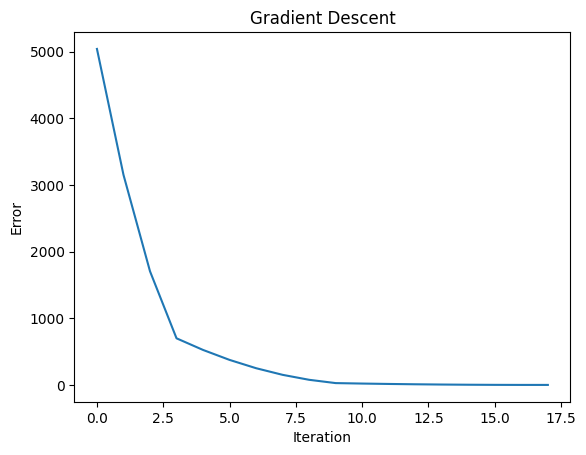

In [82]:
# initialize variables
loss_values = []
x = X.flatten()
prev_loss = 0
current_loss = loss(x)
iteration = 0

# loop through the algorithm
while abs(prev_loss - current_loss) > 1e-6 and iteration < 1000:

    loss_values.append(current_loss)
    prev_loss = current_loss

    # Perform update step using scipy.optimize.minimize
    result = scipy.optimize.minimize(fun=loss, x0=x, method="L-BFGS-B",
        jac=gradient, options={"maxiter": 1})

    # Update X with result of 1-step minimize
    x = result.x
    current_loss = loss(x)

    iteration += 1

# reshape to help plot
X_final = x.reshape(100, 50)

# Plot
plt.plot(loss_values)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Gradient Descent")
plt.show()